In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/romulosilvestre/semanamachinelearning-datasets/refs/heads/main/salario.csv")

In [ ]:
df.head()

,idade,salario
0,18,850
1,23,1500
2,28,2000
3,33,2200
4,38,2500


In [ ]:
df

,idade,salario
0,18,850
1,23,1500
2,28,2000
3,33,2200
4,38,2500
5,43,3500
6,48,3200
7,53,5000
8,58,6000
9,63,3000


In [ ]:
X_base_salario = df.iloc[:,0].values # : todas as linhas , e a coluna de índice 0

In [ ]:
X_base_salario

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [ ]:
y_base_salario = df.iloc[:,1].values

In [ ]:
y_base_salario

array([ 850, 1500, 2000, 2200, 2500, 3500, 3200, 5000, 6000, 3000])

Correlação, há uma implicação direta, ela é constante, ela é linear?

In [ ]:
import numpy as np

In [ ]:
np.corrcoef(X_base_salario,y_base_salario)

array([[1.        , 0.81892113],
       [0.81892113, 1.        ]])

Diagonal principal 1. (100%) com ela mesma.
Diagonal secundária : valores

Relacionam-se ⁉
a idade se relaciona com salário em 81%
o salário se relaciona com idade em 81%

# Modelo Preditivo

In [ ]:
# importando o algoritmo que será utilizado
from sklearn.linear_model import LinearRegression

In [ ]:
# criando o objeto da regressão linear
reg_salario = LinearRegression()

In [ ]:
# vamos formatar os dados como matriz

# formantando em matriz

X_base_salario = X_base_salario.reshape(-1,1)

In [ ]:
X_base_salario.shape

(10, 1)

In [ ]:
reg_salario.fit(X_base_salario,y_base_salario)

LinearRegression()

# parametros do modelo

In [ ]:
reg_salario.intercept_

-454.0000000000009

In [ ]:
reg_salario.coef_

array([84.66666667])

# Previsões

In [ ]:
previsao = reg_salario.predict(X_base_salario)

In [ ]:
previsao

array([1070.        , 1493.33333333, 1916.66666667, 2340.        ,
       2763.33333333, 3186.66666667, 3610.        , 4033.33333333,
       4456.66666667, 4880.        ])

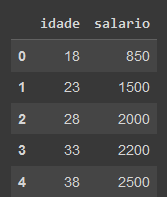

In [ ]:
reg_salario.intercept_ + reg_salario.coef_ * 23

array([1493.33333333])

In [ ]:
reg_salario.predict([[42]])

array([3102.])

# Utilizando Gráficos

In [ ]:
import plotly.express as px

In [ ]:
grafico = px.scatter(x = X_base_salario.ravel(), y= y_base_salario)
# adicionar novas informações nos gráficos
# adicionando informações de previsões
grafico.add_scatter(x=X_base_salario.ravel(),y = previsao, name="Regressão")

In [ ]:
grafico.show()

In [ ]:
from yellowbrick.regressor import ResidualsPlot

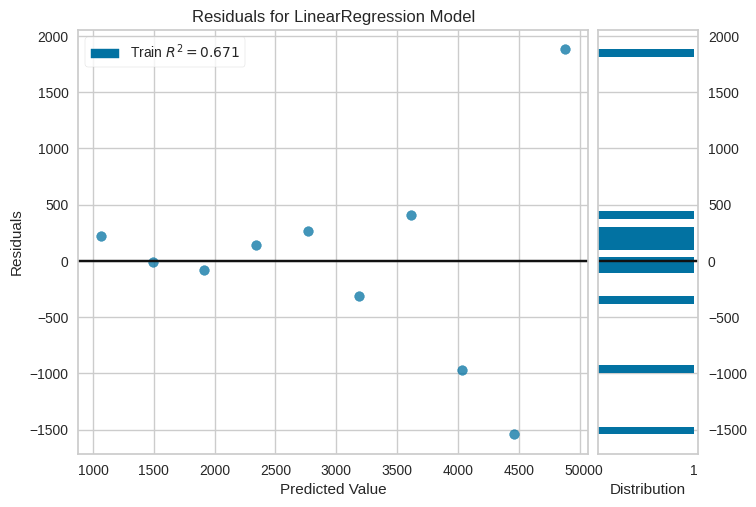

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
grafico_residual = ResidualsPlot(reg_salario)
grafico_residual.fit(X_base_salario,y_base_salario)
grafico_residual.poof()